# SVM attempt #2

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from skimage.io import imread
from skimage.transform import resize
from PIL import Image 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Part 1: image loading 

In [3]:
# to use code, change filepath based on dataset download
image_dir = r"C:\Users\sabri\Documents\Capstone\Datasets\hemorrhage CT (w labels)\head_ct\head_ct"
csv_file = r"C:\Users\sabri\Documents\Capstone\Datasets\hemorrhage CT (w labels)\labels.csv"  

# load csv file
label_df = pd.read_csv(csv_file)

# padding to standardize image name and id in csv file
padding_length = 3
label_df["padded_id"] = label_df["id"].apply(lambda x: str(x).zfill(padding_length))

image_label_mapping = dict(zip(label_df["padded_id"], label_df["hemorrhage"]))

# Prepare the dataset
images = []
labels = []

for image_file in os.listdir(image_dir):
    # Extract the ID from the filename (remove the .png extension)
    image_id = os.path.splitext(image_file)[0]
    
    if image_id in image_label_mapping:  # Check if the ID exists in the mapping
        image_path = os.path.join(image_dir, image_file)
        try:
            # Load and resize the image
            image = Image.open(image_path).convert("L")  # Convert to grayscale
            image_resized = resize(np.array(image), (64, 64))  # Resize to 64x64
            images.append(image_resized.flatten())  # Flatten to 1D array
            labels.append(image_label_mapping[image_id])  # Append the corresponding label
        except Exception as e:
            print(f"Error processing image {image_file}: {e}")

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

# Debug outputs
print(f"Loaded {len(X)} images and {len(y)} labels.")
if len(X) > 0:
    print(f"First image shape: {X[0].shape}")


Loaded 200 images and 200 labels.
First image shape: (4096,)


In [4]:
# some visualization to check if images loaded properly 

print(label_df.head())
print(label_df.columns)
print("Images in directory:", os.listdir(image_dir))  
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Number of images loaded:", len(images)) 
print("Number of labels:", len(labels))  
print("Sample labels:", labels[:5])

   id  hemorrhage padded_id
0   0           1       000
1   1           1       001
2   2           1       002
3   3           1       003
4   4           1       004
Index(['id', 'hemorrhage', 'padded_id'], dtype='object')
Images in directory: ['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.

## part 2: SVM model training

In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.85      0.81      0.83        21

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40

Accuracy Score: 0.825


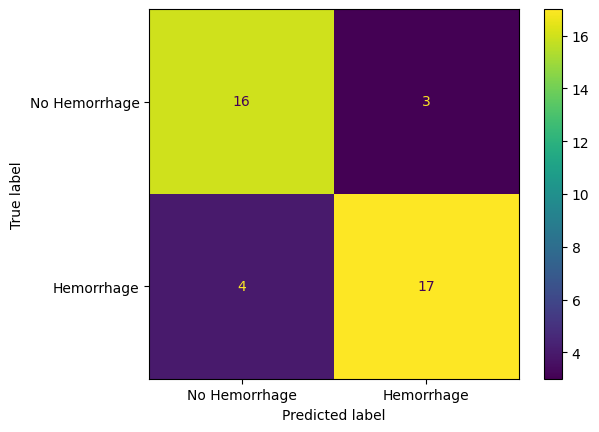

In [6]:

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hemorrhage', 'Hemorrhage'])
disp.plot(cmap="viridis")


# HML Attempt 1: kmeans + svm

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from skimage.transform import resize

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.85      0.81      0.83        21

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40

Accuracy Score: 0.825


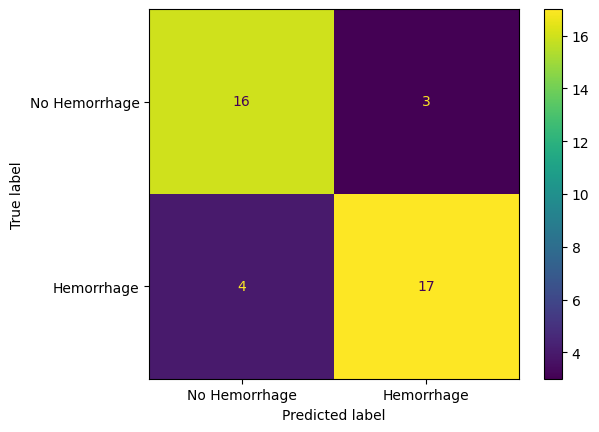

In [2]:
image_dir = r"C:\Users\sabri\Documents\Capstone\Datasets\hemorrhage CT (w labels)\head_ct\head_ct"
csv_file = r"C:\Users\sabri\Documents\Capstone\Datasets\hemorrhage CT (w labels)\labels.csv"

# load files and pad the ids for consistency
label_df = pd.read_csv(csv_file)
padding_length = 3
label_df["padded_id"] = label_df["id"].apply(lambda x: str(x).zfill(padding_length))
image_label_mapping = dict(zip(label_df["padded_id"], label_df["hemorrhage"]))

def load_images(image_folder, image_size=(64, 64)):
    images = []
    labels = []
    filenames = []
    for image_file in os.listdir(image_folder):
        image_id = os.path.splitext(image_file)[0]
        if image_id in image_label_mapping:
            image_path = os.path.join(image_folder, image_file)
            try:
                img = Image.open(image_path).convert("L")  # Grayscale conversion
                img_resized = resize(np.array(img), image_size)  # Resize
                images.append(img_resized.flatten())  # Flatten
                labels.append(image_label_mapping[image_id])  # Map label
                filenames.append(image_file)
            except Exception as e:
                print(f"Error processing {image_file}: {e}")
    return np.array(images), np.array(labels), filenames

# preprocessing
image_size = (64, 64)
images, labels, image_names = load_images(image_dir, image_size)
images_normalized = images / 255.0

# K-means clustering
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_features = kmeans.fit_transform(images_normalized) 

#key: combine the clustered data as features 
X_combined = np.hstack((images_normalized, cluster_features))

# train test split for svm
X_train, X_test, y_train, y_test = train_test_split(X_combined, labels, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# svm training
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Hemorrhage', 'Hemorrhage'])
disp.plot(cmap="viridis")
plt.show()